C:\Users\Shadow\AppData\Local\Temp\ipykernel_24724\1921568661.py:9: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of anomalies detected: 889
count    17764.000000
mean         0.140620
std          0.065149
min         -0.256389
25%          0.124332
50%          0.161300
75%          0.183270
max          0.207683
Name: anomaly_score, dtype: float64


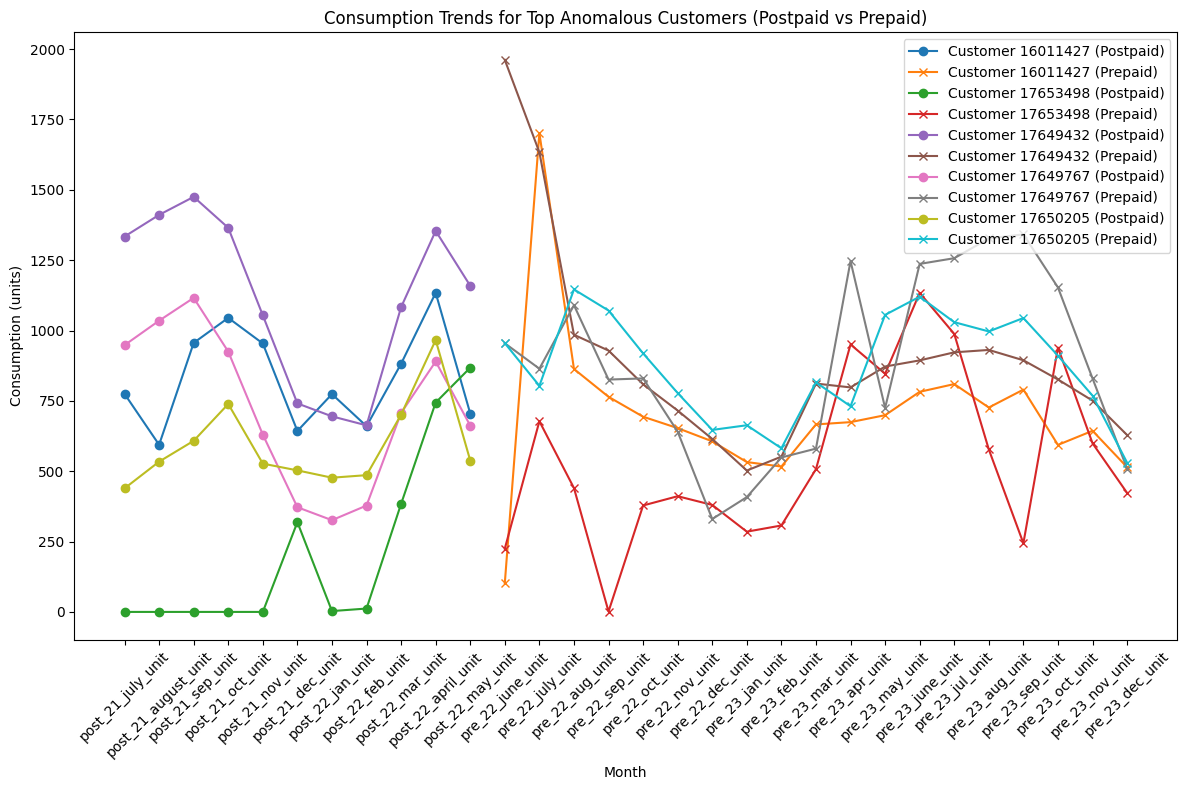

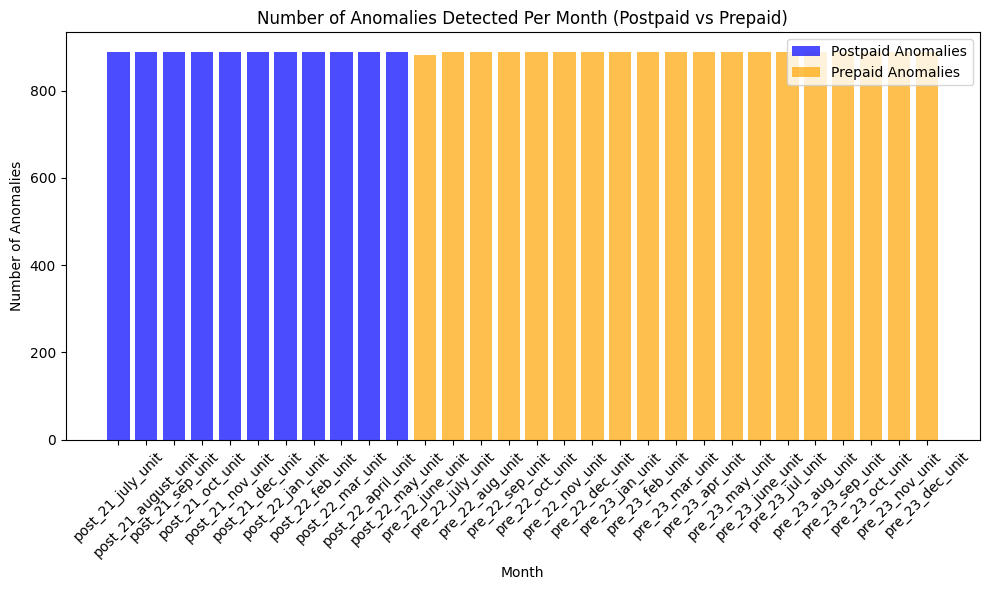

In [3]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

# Load your dataset
file_path = 'dataset.csv'  
data = pd.read_csv(file_path)

# Define postpaid and prepaid column names
postpaid_columns = [col for col in data.columns if 'post_' in col]
prepaid_columns = [col for col in data.columns if 'pre_' in col]

# Convert relevant columns to numeric and handle errors
data[postpaid_columns + prepaid_columns] = data[postpaid_columns + prepaid_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with excessive NaNs (optional thresholding to remove rows with too many missing values)
threshold = int(len(postpaid_columns + prepaid_columns) * 0.5)
data_cleaned = data.dropna(thresh=threshold)

# Select consumption-related columns for anomaly detection (postpaid and prepaid months)
consumption_data = data_cleaned[postpaid_columns + prepaid_columns]

# Handle missing values by filling with the median value
consumption_data = consumption_data.fillna(consumption_data.median())

# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the consumption data
iso_forest.fit(consumption_data)

# Predict anomalies (-1 indicates anomaly, 1 indicates normal)
anomaly_labels = iso_forest.predict(consumption_data)

# Calculate anomaly scores (lower scores are more likely to be anomalies)
anomaly_scores = iso_forest.decision_function(consumption_data)

# Add anomaly labels and scores to the cleaned dataset
data_cleaned['anomaly_label'] = anomaly_labels
data_cleaned['anomaly_score'] = anomaly_scores

# Summarize the number of anomalies detected
num_anomalies = sum(anomaly_labels == -1)
print(f"Number of anomalies detected: {num_anomalies}")

# Distribution of anomaly scores
print(data_cleaned['anomaly_score'].describe())

# -- MODIFICATION STARTS HERE --
# Save full data with both anomalies and normal customers to a CSV file
data_cleaned.to_csv('NIF_full_data_with_anomalies.csv', index=False)  # All customers including anomaly labels

# Save only the normal customers (anomaly_label = 1)
normal_customers = data_cleaned[data_cleaned['anomaly_label'] == 1]
normal_customers.to_csv('NIF_normal_customers.csv', index=False)  # Normal customers saved here
# -- MODIFICATION ENDS HERE --

# Identifying customers who are flagged as anomalous most frequently
anomalous_data = data_cleaned[data_cleaned['anomaly_label'] == -1]
anomaly_frequencies = anomalous_data.groupby('Customer No')['anomaly_label'].count()

# Sort customers by frequency of anomalies
frequent_anomalies = anomaly_frequencies.sort_values(ascending=False)

# Extract top 5 anomalous customers
top_customers = frequent_anomalies.head(5).index
top_customers_data = data_cleaned[data_cleaned['Customer No'].isin(top_customers)]

# Plot consumption trends for the top 5 anomalous customers
plt.figure(figsize=(12, 8))
for customer in top_customers:
    customer_data = top_customers_data[top_customers_data['Customer No'] == customer]
    plt.plot(postpaid_columns, customer_data[postpaid_columns].values.flatten(), label=f'Customer {customer} (Postpaid)', marker='o')
    plt.plot(prepaid_columns, customer_data[prepaid_columns].values.flatten(), label=f'Customer {customer} (Prepaid)', marker='x')

plt.title('Consumption Trends for Top Anomalous Customers (Postpaid vs Prepaid)')
plt.xlabel('Month')
plt.ylabel('Consumption (units)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('NIF_Consumption Trends for Top Anomalous Customers (Postpaid vs Prepaid).png', dpi=300)
plt.show()

# Anomalies per month for postpaid and prepaid periods
anomalies_per_month_postpaid = anomalous_data[postpaid_columns].notna().sum()
anomalies_per_month_prepaid = anomalous_data[prepaid_columns].notna().sum()

# Plotting the number of anomalies per month
plt.figure(figsize=(10, 6))
plt.bar(postpaid_columns, anomalies_per_month_postpaid, label='Postpaid Anomalies', alpha=0.7, color='blue')
plt.bar(prepaid_columns, anomalies_per_month_prepaid, label='Prepaid Anomalies', alpha=0.7, color='orange')
plt.xticks(rotation=45)
plt.title('Number of Anomalies Detected Per Month (Postpaid vs Prepaid)')
plt.xlabel('Month')
plt.ylabel('Number of Anomalies')
plt.legend()
plt.tight_layout()
plt.savefig('NIF_Number of Anomalies Detected Per Month (Postpaid vs Prepaid).png', dpi=300)
plt.show()

# Save anomalies to a CSV file (optional)
anomalous_data.to_csv('NIF_anomalies_detected.csv', index=False) 


C:\Users\Shadow\AppData\Local\Temp\ipykernel_24724\3559196950.py:8: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Number of anomalies detected: 889
count    17764.000000
mean         0.122533
std          0.061143
min         -0.266103
25%          0.104999
50%          0.141744
75%          0.162353
max          0.190819
Name: anomaly_score, dtype: float64


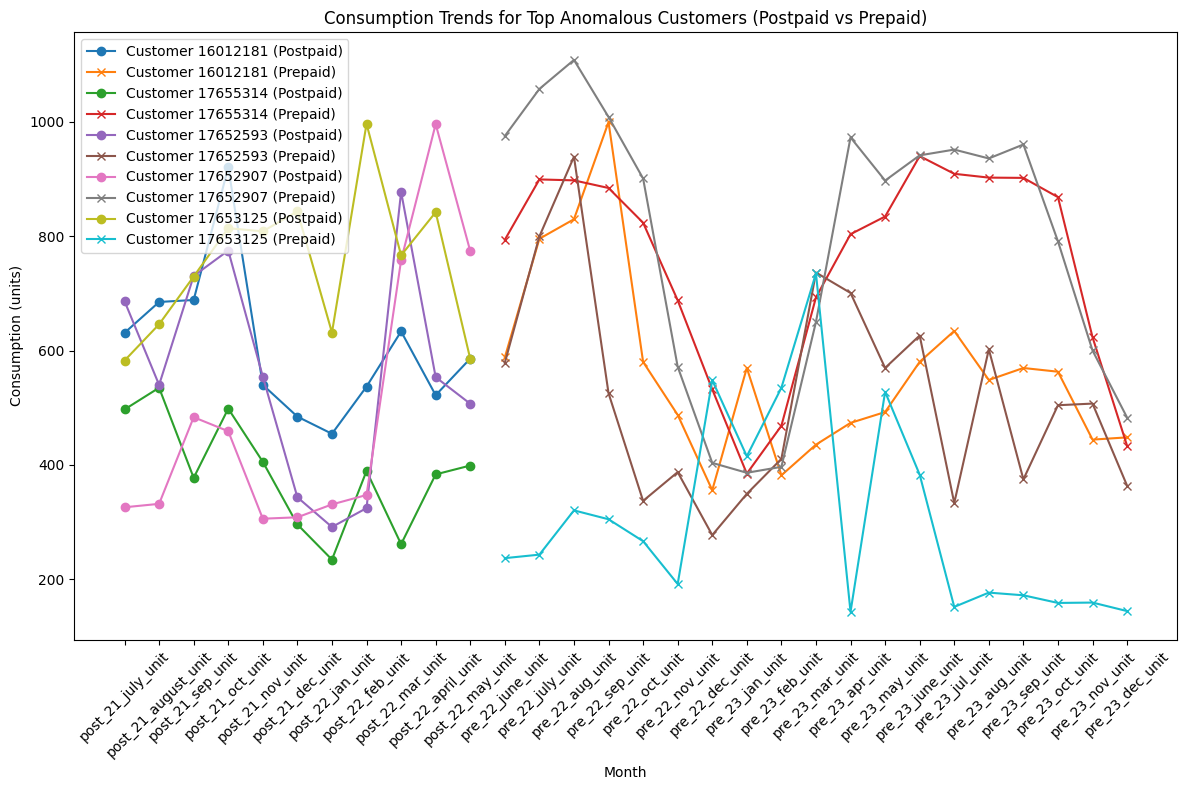

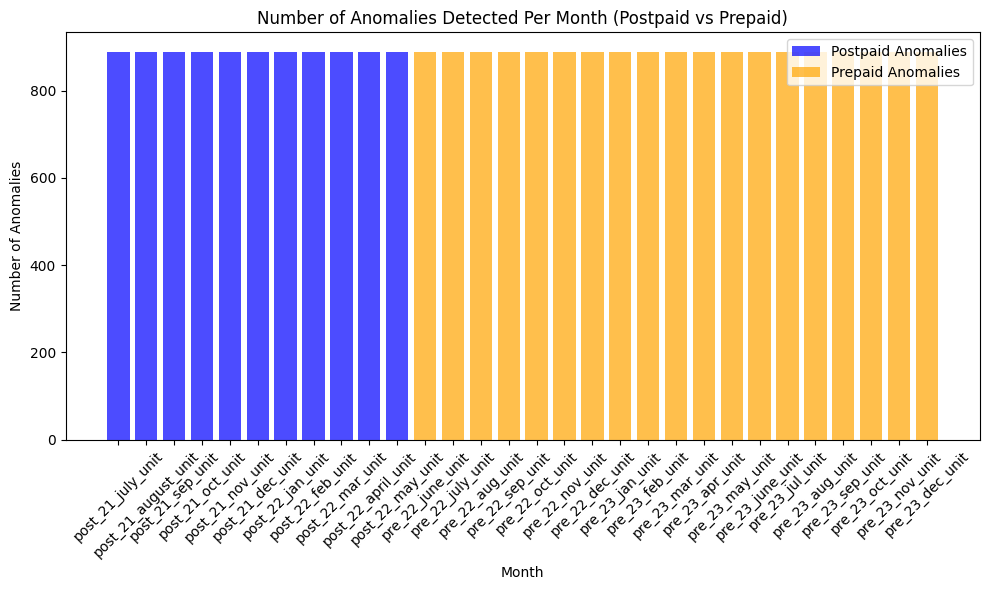

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns


file_path = 'dataset.csv'  
data = pd.read_csv(file_path)

# Define postpaid and prepaid column names
postpaid_columns = [col for col in data.columns if 'post_' in col]
prepaid_columns = [col for col in data.columns if 'pre_' in col]

# Convert relevant columns to numeric and handle errors
data[postpaid_columns + prepaid_columns] = data[postpaid_columns + prepaid_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with excessive NaNs (optional thresholding to remove rows with too many missing values)
threshold = int(len(postpaid_columns + prepaid_columns) * 0.5)
data_cleaned = data.dropna(thresh=threshold)

# Select consumption-related columns for anomaly detection (postpaid and prepaid months)
consumption_data = data_cleaned[postpaid_columns + prepaid_columns]

# Handle missing values by filling with the median value (before applying rolling avg)
consumption_data = consumption_data.fillna(consumption_data.median())

# Apply rolling average with a window size of 2 months to smooth short-term variations
window_size = 2  # Adjust based on how much smoothing you want
data_cleaned[postpaid_columns] = data_cleaned[postpaid_columns].rolling(window=window_size, min_periods=1).mean()
data_cleaned[prepaid_columns] = data_cleaned[prepaid_columns].rolling(window=window_size, min_periods=1).mean()

# Fill the remaining NaNs in the smoothed data with median (after rolling average)
data_cleaned[postpaid_columns + prepaid_columns] = data_cleaned[postpaid_columns + prepaid_columns].fillna(data_cleaned.median())

# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model to the smoothed and cleaned consumption data
iso_forest.fit(data_cleaned[postpaid_columns + prepaid_columns])

# Predict anomalies (-1 indicates anomaly, 1 indicates normal)
anomaly_labels = iso_forest.predict(data_cleaned[postpaid_columns + prepaid_columns])

# Calculate anomaly scores (lower scores are more likely to be anomalies)
anomaly_scores = iso_forest.decision_function(data_cleaned[postpaid_columns + prepaid_columns])

# Add anomaly labels and scores to the cleaned dataset
data_cleaned['anomaly_label'] = anomaly_labels
data_cleaned['anomaly_score'] = anomaly_scores

# Summarize the number of anomalies detected
num_anomalies = sum(anomaly_labels == -1)
print(f"Number of anomalies detected: {num_anomalies}")

# Distribution of anomaly scores
print(data_cleaned['anomaly_score'].describe())

# Save full data with both anomalies and normal data to a CSV file
data_cleaned.to_csv('RA+IF_full_data_with_anomalies.csv', index=False)  # All customers including anomaly labels

# Save only the normal customers (anomaly_label = 1)
normal_customers = data_cleaned[data_cleaned['anomaly_label'] == 1]
normal_customers.to_csv('RA+IF_normal_customers.csv', index=False)  # Normal customers saved here

# Identifying customers who are flagged as anomalous most frequently
anomalous_data = data_cleaned[data_cleaned['anomaly_label'] == -1]
anomaly_frequencies = anomalous_data.groupby('Customer No')['anomaly_label'].count()

# Sort customers by frequency of anomalies
frequent_anomalies = anomaly_frequencies.sort_values(ascending=False)

# Extract top 5 anomalous customers
top_customers = frequent_anomalies.head(5).index
top_customers_data = data_cleaned[data_cleaned['Customer No'].isin(top_customers)]

# Plot consumption trends for the top 5 anomalous customers (using smoothed data)
plt.figure(figsize=(12, 8))
for customer in top_customers:
    customer_data = top_customers_data[top_customers_data['Customer No'] == customer]
    plt.plot(postpaid_columns, customer_data[postpaid_columns].values.flatten(), label=f'Customer {customer} (Postpaid)', marker='o')
    plt.plot(prepaid_columns, customer_data[prepaid_columns].values.flatten(), label=f'Customer {customer} (Prepaid)', marker='x')

plt.title('Consumption Trends for Top Anomalous Customers (Postpaid vs Prepaid)')
plt.xlabel('Month')
plt.ylabel('Consumption (units)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('RA+IF_Consumption Trends for Top Anomalous Customers (Postpaid vs Prepaid).png', dpi=300)
plt.show()

# Anomalies per month for postpaid and prepaid periods
anomalies_per_month_postpaid = anomalous_data[postpaid_columns].notna().sum()
anomalies_per_month_prepaid = anomalous_data[prepaid_columns].notna().sum()

# Plotting the number of anomalies per month
plt.figure(figsize=(10, 6))
plt.bar(postpaid_columns, anomalies_per_month_postpaid, label='Postpaid Anomalies', alpha=0.7, color='blue')
plt.bar(prepaid_columns, anomalies_per_month_prepaid, label='Prepaid Anomalies', alpha=0.7, color='orange')
plt.xticks(rotation=45)
plt.title('Number of Anomalies Detected Per Month (Postpaid vs Prepaid)')
plt.xlabel('Month')
plt.ylabel('Number of Anomalies')
plt.legend()
plt.tight_layout()
plt.savefig('RA+IF_Number of Anomalies Detected Per Month (Postpaid vs Prepaid).png', dpi=300)
plt.show()

# Save anomalies to a CSV file 
anomalous_data.to_csv('RA+IF_anomalies_detected.csv', index=False)
